In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Car_Price.csv')
df

,Unnamed: 0,year,company name,car model,km driven,ownership,Fuel,Price,Transmission,Variant,City
0,0,2009,Toyota,Camry,"99,864",1st Owner,Petrol,"₹3,07,299",Automatic,W4 AT Automatic,Mumbai
1,1,2020,Hyundai,VENUE,"4,489",1st Owner,Petrol,"₹9,52,499",Manual,SX 1.0 GDI IMT Manual,Mumbai
2,2,2020,Hyundai,VENUE,547,1st Owner,Petrol,"₹8,26,399",Manual,S MT 1.2 KAPPA Manual,Mumbai
3,3,2018,Maruti,Swift,"8,339",1st Owner,Petrol,"₹5,86,999",Manual,VXI Manual,Mumbai
4,4,2016,Mahindra,Kuv100,"44,486",1st Owner,Petrol,"₹3,90,799",Manual,K6+ 5 STR Manual,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
4163,4163,2015,Audi,A4,"41,462",1st Owner,Diesel,"₹18,17,399",Automatic,35 TDI PREMIUM PLUS SUNROOF Automatic,Zirakpur
4164,4164,2017,Maruti,Vitara Brezza,"41,289",1st Owner,Diesel,"₹7,63,999",Manual,ZDI Manual,Zirakpur
4165,4165,2018,Maruti,Vitara Brezza,"38,872",1st Owner,Diesel,"₹7,55,199",Manual,ZDI Manual,Zirakpur
4166,4166,2016,Hyundai,Grand i10,"22,387",1st Owner,Petrol,"₹4,36,499",Manual,ASTA 1.2 (O) VTVT Manual,Zirakpur


In [3]:
df['company name'].value_counts()

Maruti        2267
Hyundai        916
Ford           251
Honda          189
Renault         99
Volkswagen      86
Toyota          77
Tata            66
Mahindra        39
KIA             34
Skoda           28
MG              28
Datsun          25
Audi            15
Jeep            13
BMW             11
Mercedes        10
Ssangyong        8
Nissan           4
HYUNDAI          1
RENAULT          1
Name: company name, dtype: int64

In [4]:
df['company name']=df['company name'].str.replace('HYUNDAI','Hyundai')
df['company name']=df['company name'].str.replace('RENAULT','Renault')
df['company name'].value_counts()

Maruti        2267
Hyundai        917
Ford           251
Honda          189
Renault        100
Volkswagen      86
Toyota          77
Tata            66
Mahindra        39
KIA             34
Skoda           28
MG              28
Datsun          25
Audi            15
Jeep            13
BMW             11
Mercedes        10
Ssangyong        8
Nissan           4
Name: company name, dtype: int64

In [5]:
df.drop('Variant',inplace=True,axis=1)

In [6]:
df.describe()

,Unnamed: 0,year
count,4168.00000,4168.000000
mean,2083.50000,2016.991123
std,1203.34229,2.231538
min,0.00000,2008.000000
25%,1041.75000,2016.000000
50%,2083.50000,2017.000000
75%,3125.25000,2019.000000
max,4167.00000,2021.000000


Here we have only one columns as int that is year. and we have oldest model of the year 2008 and latest model is 2021.

In [7]:
tabel=[]

for i in df.columns:
    tabel.append([i,df[i].nunique(),df[i].drop_duplicates().values])
    
pd.DataFrame(tabel,columns=['Features','Unique No','Values'])

,Features,Unique No,Values
0,Unnamed: 0,4168,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,year,14,"[2009, 2020, 2018, 2016, 2015, 2011, 2014, 201..."
2,company name,19,"[Toyota, Hyundai, Maruti, Mahindra, Volkswagen..."
3,car model,107,"[Camry, VENUE, Swift, Kuv100, Creta, Etios, Am..."
4,km driven,2189,"[99,864, 4,489, 547, 8,339, 44,486, 1,10,584, ..."
5,ownership,4,"[1st Owner, 2nd Owner, 3rd Owner, 4th Owner]"
6,Fuel,4,"[Petrol, Diesel, Petrol + CNG, Petrol + LPG]"
7,Price,1923,"[₹3,07,299, ₹9,52,499, ₹8,26,399, ₹5,86,999, ₹..."
8,Transmission,2,"[Automatic, Manual, nan]"
9,City,30,"[Mumbai, New Delhi, Gurgaon, Pune, Bengaluru, ..."


In [8]:
df.isnull().sum()

Unnamed: 0       0
year             0
company name     0
car model        0
km driven        0
ownership        0
Fuel             0
Price            0
Transmission    95
City             0
dtype: int64

Transmission have 90 null values that will be replaces during Data Preprocessing part.

In [9]:
df['Price']=df['Price'].str.replace(',','')
df['km driven']=df['km driven'].str.replace(',','')

In [10]:
df['Price']=df['Price'].str.replace('₹','')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4168 non-null   int64 
 1   year          4168 non-null   int64 
 2   company name  4168 non-null   object
 3   car model     4168 non-null   object
 4   km driven     4168 non-null   object
 5   ownership     4168 non-null   object
 6   Fuel          4168 non-null   object
 7   Price         4168 non-null   object
 8   Transmission  4073 non-null   object
 9   City          4168 non-null   object
dtypes: int64(2), object(8)
memory usage: 325.8+ KB


In [12]:
df['km driven']=df['km driven'].astype('int64')
df['Price']=df['Price'].astype('int64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4168 non-null   int64 
 1   year          4168 non-null   int64 
 2   company name  4168 non-null   object
 3   car model     4168 non-null   object
 4   km driven     4168 non-null   int64 
 5   ownership     4168 non-null   object
 6   Fuel          4168 non-null   object
 7   Price         4168 non-null   int64 
 8   Transmission  4073 non-null   object
 9   City          4168 non-null   object
dtypes: int64(4), object(6)
memory usage: 325.8+ KB


In [14]:
df

,Unnamed: 0,year,company name,car model,km driven,ownership,Fuel,Price,Transmission,City
0,0,2009,Toyota,Camry,99864,1st Owner,Petrol,307299,Automatic,Mumbai
1,1,2020,Hyundai,VENUE,4489,1st Owner,Petrol,952499,Manual,Mumbai
2,2,2020,Hyundai,VENUE,547,1st Owner,Petrol,826399,Manual,Mumbai
3,3,2018,Maruti,Swift,8339,1st Owner,Petrol,586999,Manual,Mumbai
4,4,2016,Mahindra,Kuv100,44486,1st Owner,Petrol,390799,Manual,Mumbai
...,...,...,...,...,...,...,...,...,...,...
4163,4163,2015,Audi,A4,41462,1st Owner,Diesel,1817399,Automatic,Zirakpur
4164,4164,2017,Maruti,Vitara Brezza,41289,1st Owner,Diesel,763999,Manual,Zirakpur
4165,4165,2018,Maruti,Vitara Brezza,38872,1st Owner,Diesel,755199,Manual,Zirakpur
4166,4166,2016,Hyundai,Grand i10,22387,1st Owner,Petrol,436499,Manual,Zirakpur


# Visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

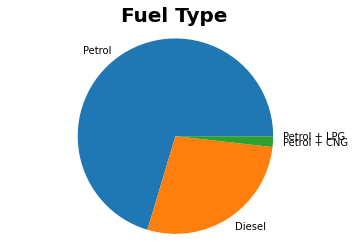

In [16]:
plt.pie(df['Fuel'].value_counts(),labels=df['Fuel'].value_counts().index)
plt.title('Fuel Type',fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

In [17]:
cat=[feature for feature in df.columns if df[feature].dtype=='O']
cat

['company name', 'car model', 'ownership', 'Fuel', 'Transmission', 'City']

In [18]:
col=['company name', 'ownership', 'Fuel', 'Transmission', 'City']

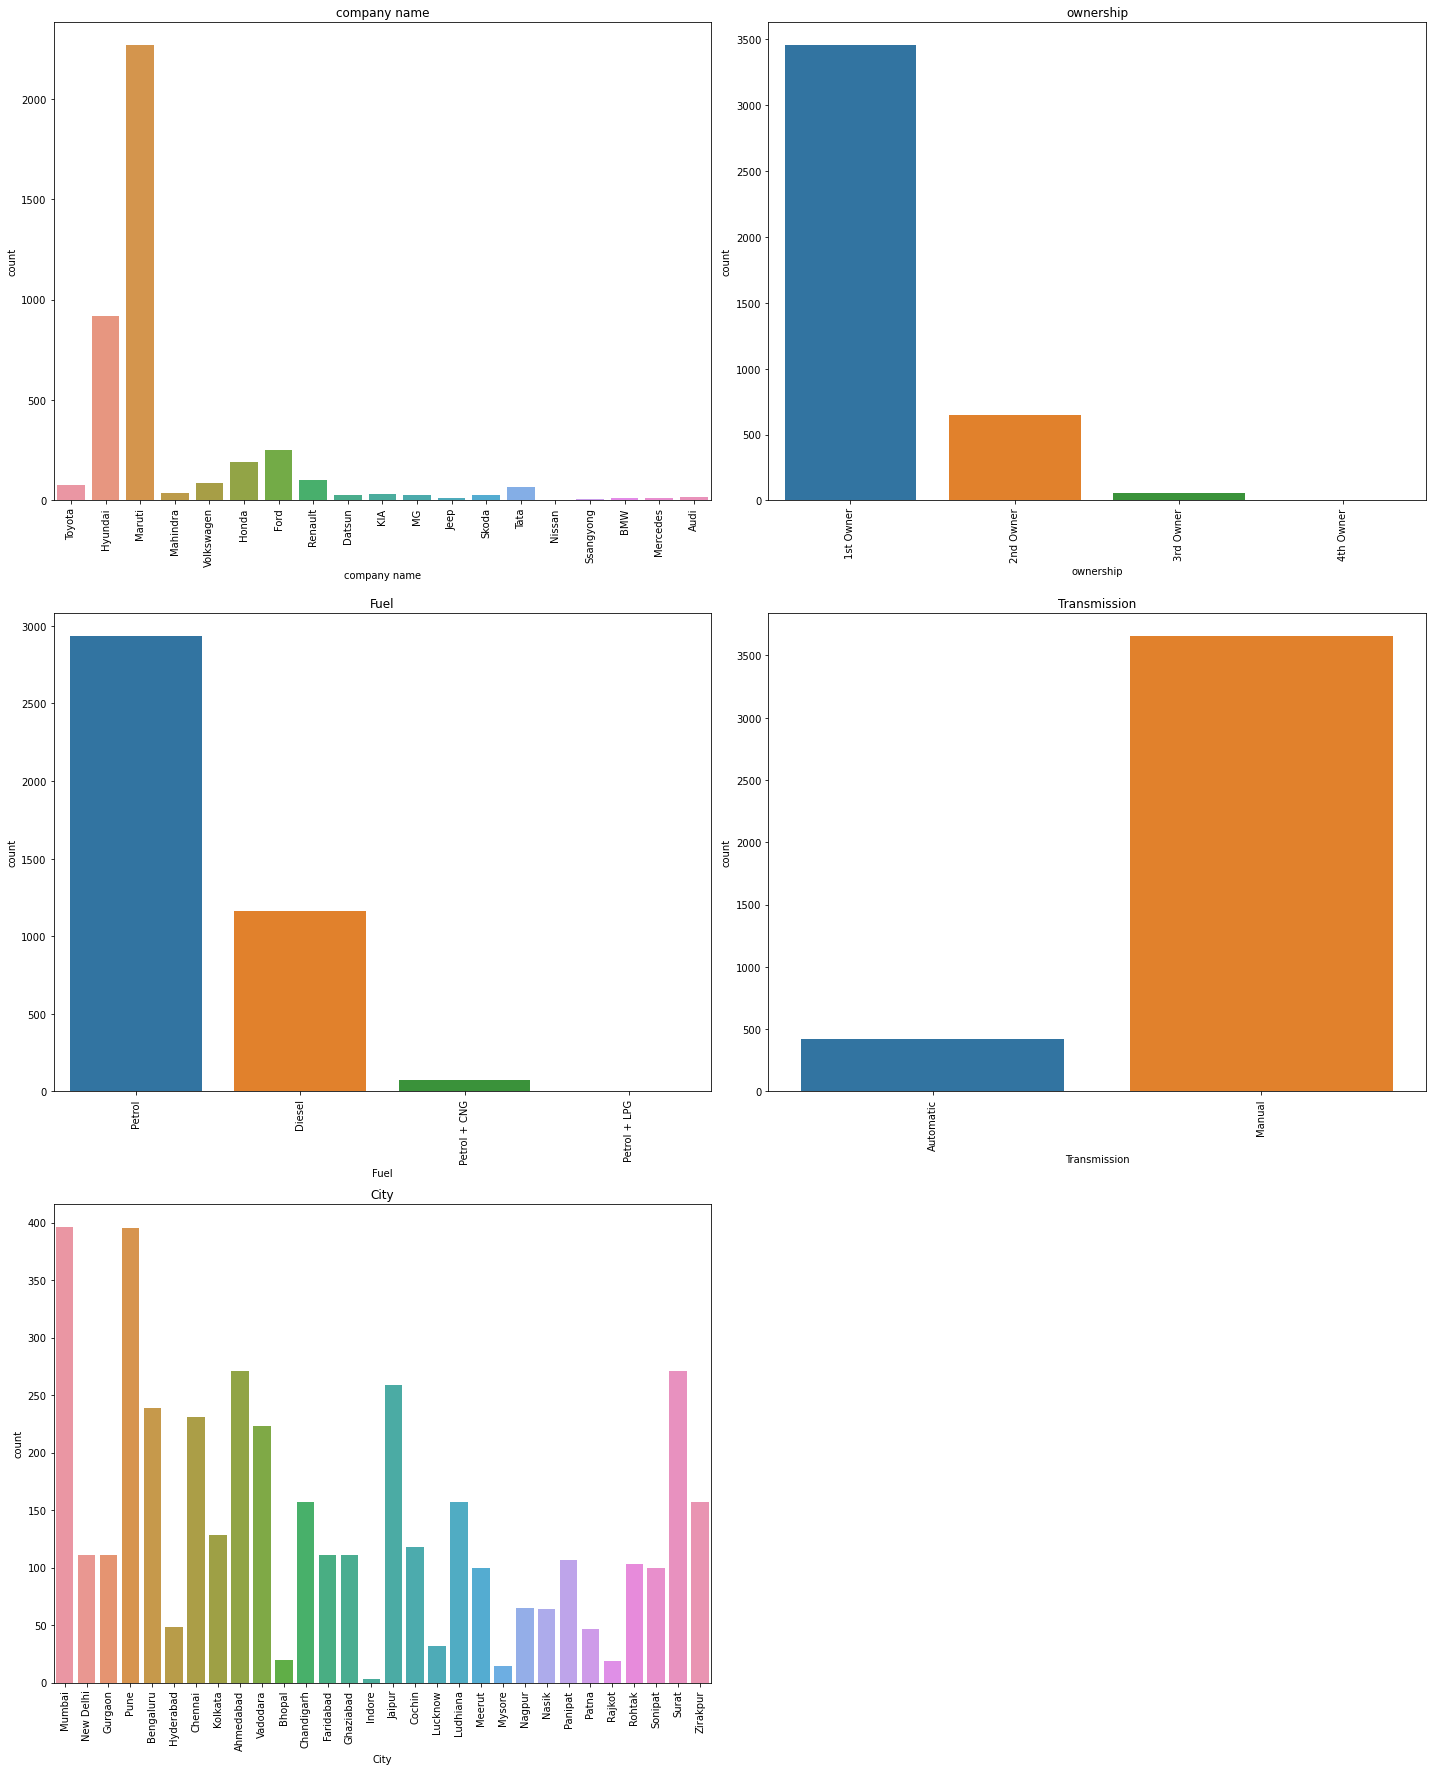

In [19]:
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(5,2,i+1)
    sns.countplot(df[col[i]])
    plt.title(col[i])
    plt.xticks(rotation=90,fontsize=10)
    plt.tight_layout()

# Observation

1)Maruti having high count for sell as compair to otherbrans which means that people who used Maruti's car they sell it fot second Hand.
after Maruti, Honda and Hyundai are sell second hand.

2)Most of the cars are from the 1st owner and after that 2nd and 3rd owners.

3)Most of the people are prefere the petrol cars because they have low maintance cost as compair to Diesel and life of petrol car
is high than the Diesel car and some people use the Diesel car because they have good mileage.

4)Most os the cars are Manually Transmission and very fews are Automatic.because Automatic having high cost as compair to Manual

5)They are many people from Mumbai,Pune,Jaipur and Surat sell their car and from city like Rajkot,Chennai,Hydrabad ,Indore they are very less for selling the cars.

<AxesSubplot:xlabel='km driven', ylabel='Density'>

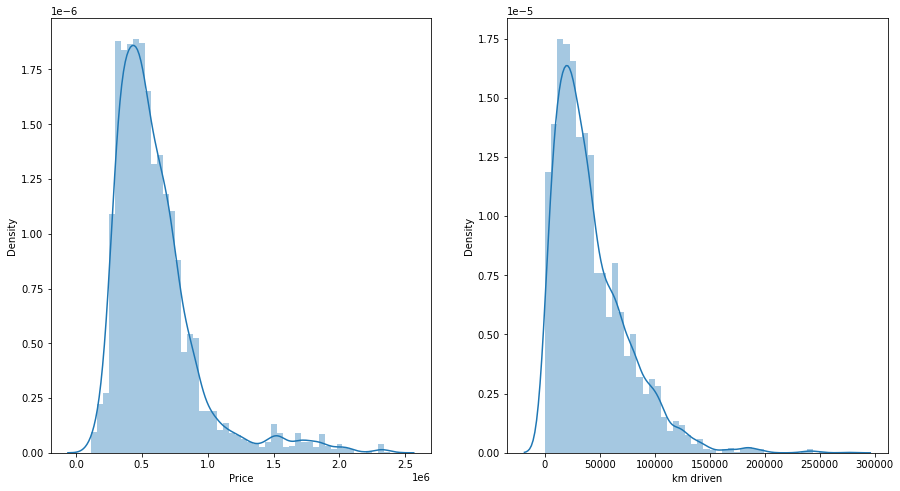

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(df['Price'])
plt.subplot(1,2,2)
sns.distplot(df['km driven'])


From this chart we can see that Both Price and Km Driven are skewed.

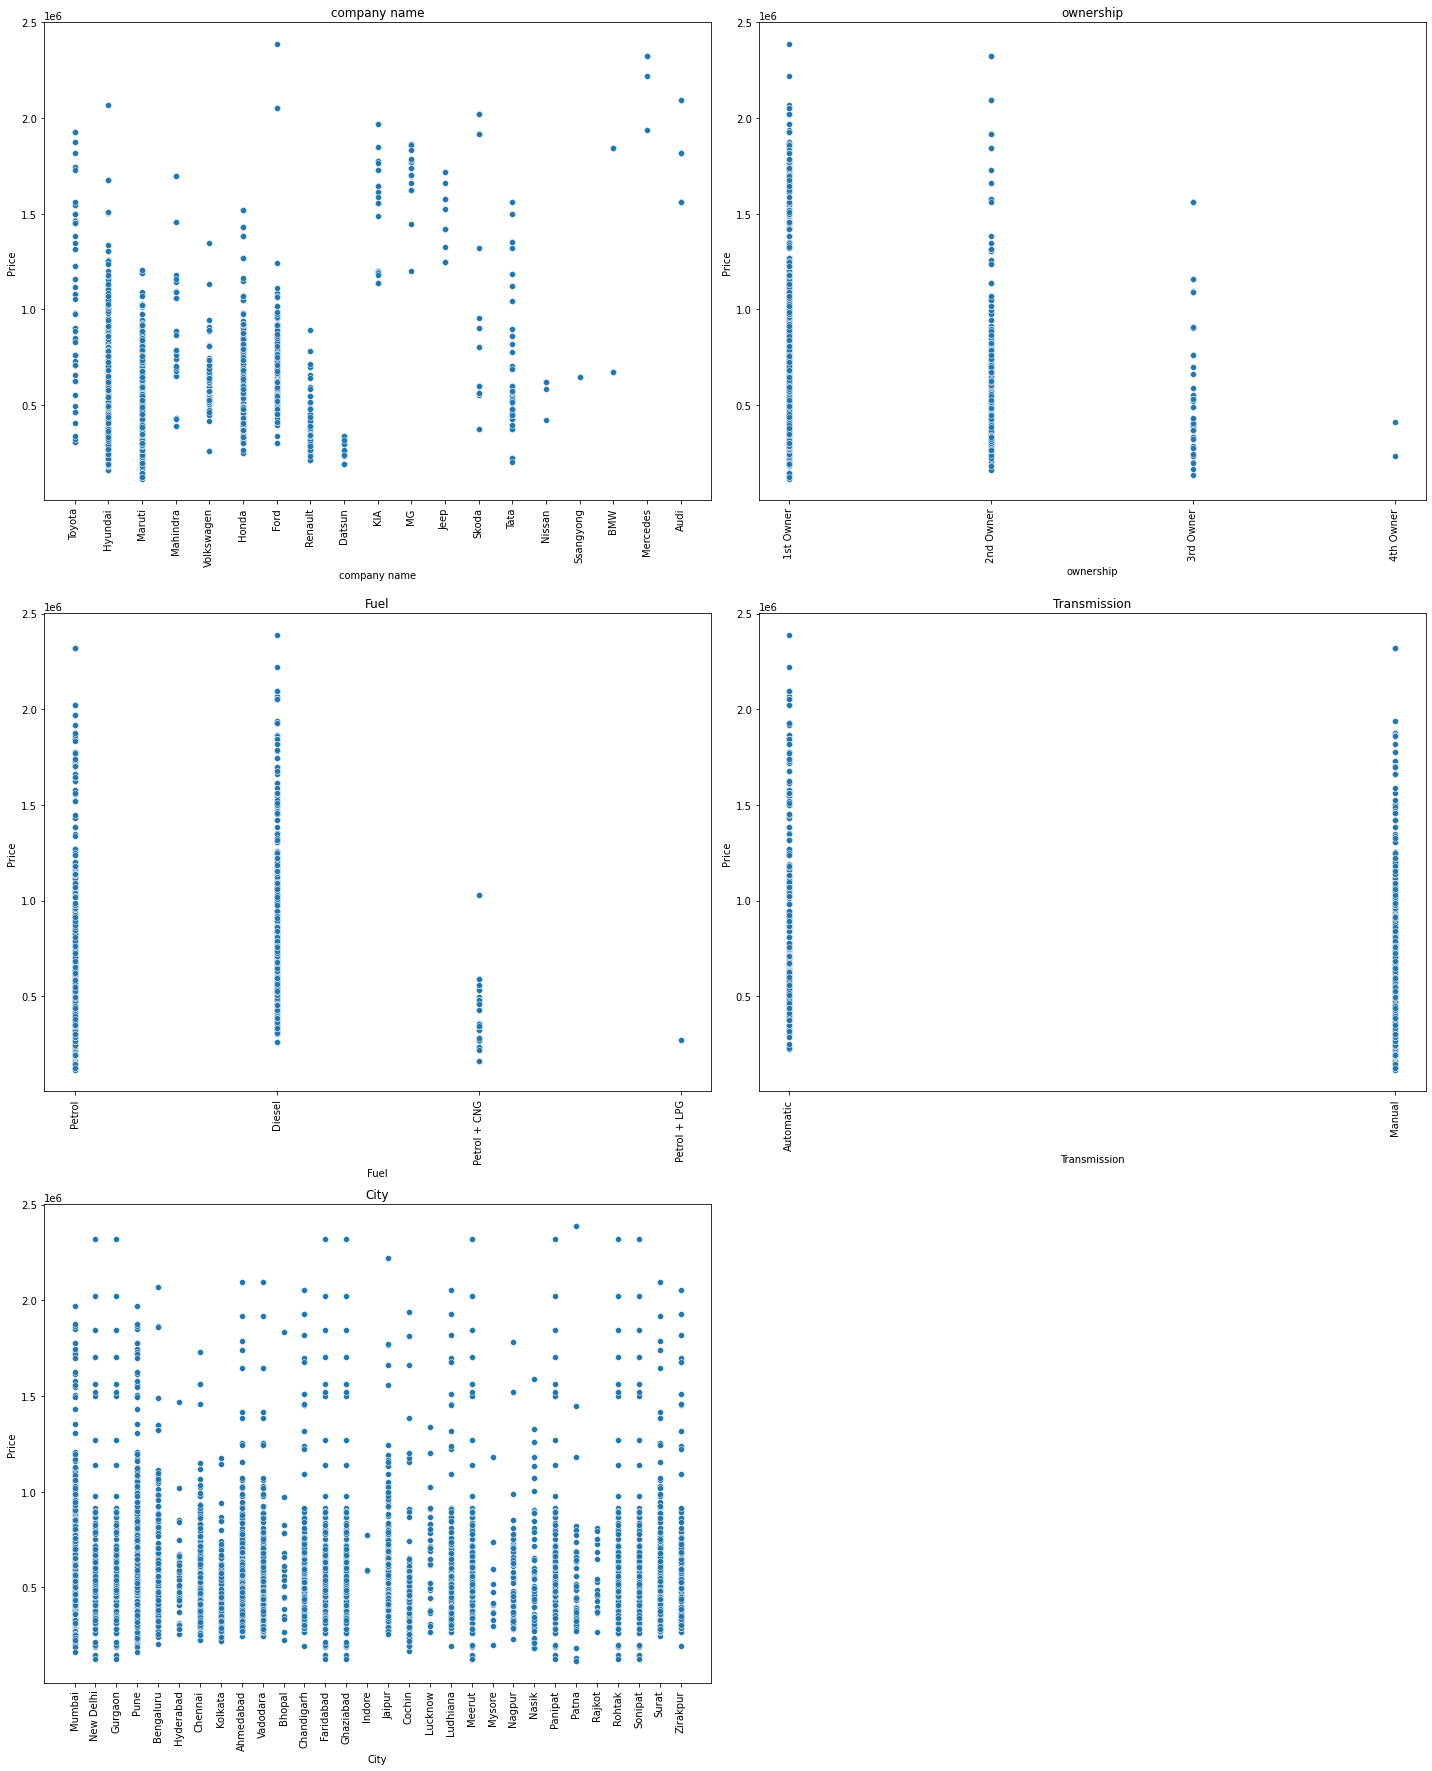

In [21]:
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=df[col[i]],y=df['Price'])
    plt.title(col[i])
    plt.xticks(rotation=90,fontsize=10)
    plt.tight_layout()

# Observation

1)Company like BMW,Audi,Mercedes having high price after that Jeep ,KIA are coming for higher price.Maruti ,Toyota ,Honda and Tata 
having relatively low prices.

2) Price for the 1st owner is high and after than 2nd owner and follow by 3rd and 4th owner.because as the owner changes chances
of low milage and maintances cost will increases.

3)price for the petrol is high than petrol+LPG and Petrol+CNG

4) As we earily show that Mumbai,pune,Surat having high no. of car selling so price is also high for that city as compair to
other city like Hydrabad,Mysure,Chennai,Rajkot.

(array([   0., 2000., 4000.]), [])

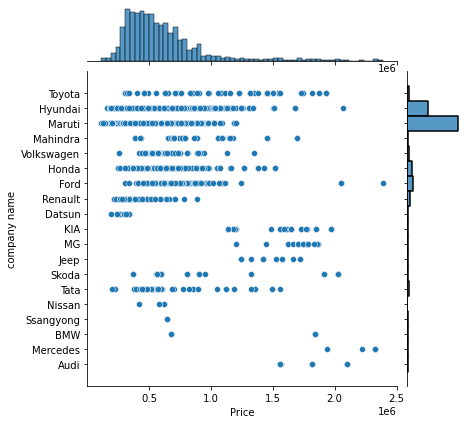

In [22]:
sns.jointplot(y=df['company name'],x=df['Price'])
plt.xticks(rotation=90)

From these chart we can see that Price of the Maruti is low and volume of the Maruti car is high. and price for the Audi ,BMD
Mercedes is high and volume is too much low.

In [23]:
df

,Unnamed: 0,year,company name,car model,km driven,ownership,Fuel,Price,Transmission,City
0,0,2009,Toyota,Camry,99864,1st Owner,Petrol,307299,Automatic,Mumbai
1,1,2020,Hyundai,VENUE,4489,1st Owner,Petrol,952499,Manual,Mumbai
2,2,2020,Hyundai,VENUE,547,1st Owner,Petrol,826399,Manual,Mumbai
3,3,2018,Maruti,Swift,8339,1st Owner,Petrol,586999,Manual,Mumbai
4,4,2016,Mahindra,Kuv100,44486,1st Owner,Petrol,390799,Manual,Mumbai
...,...,...,...,...,...,...,...,...,...,...
4163,4163,2015,Audi,A4,41462,1st Owner,Diesel,1817399,Automatic,Zirakpur
4164,4164,2017,Maruti,Vitara Brezza,41289,1st Owner,Diesel,763999,Manual,Zirakpur
4165,4165,2018,Maruti,Vitara Brezza,38872,1st Owner,Diesel,755199,Manual,Zirakpur
4166,4166,2016,Hyundai,Grand i10,22387,1st Owner,Petrol,436499,Manual,Zirakpur


In [24]:
df['Price'].max()

2387299

<AxesSubplot:xlabel='Price', ylabel='car model'>

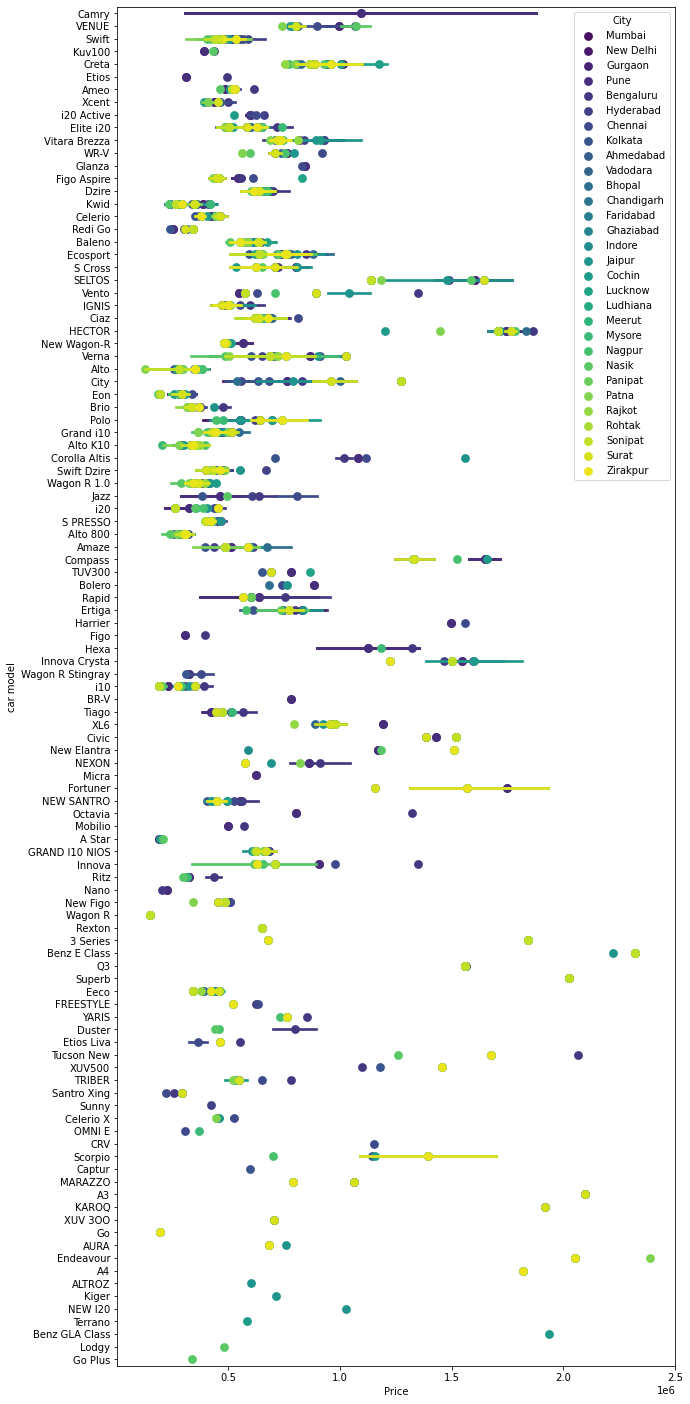

In [25]:
plt.figure(figsize=(10,25))
sns.pointplot(y=df['car model'],x=df['Price'],hue=df['City'],palette='viridis',join=False)

# Data PreProcessing

In [26]:
df

,Unnamed: 0,year,company name,car model,km driven,ownership,Fuel,Price,Transmission,City
0,0,2009,Toyota,Camry,99864,1st Owner,Petrol,307299,Automatic,Mumbai
1,1,2020,Hyundai,VENUE,4489,1st Owner,Petrol,952499,Manual,Mumbai
2,2,2020,Hyundai,VENUE,547,1st Owner,Petrol,826399,Manual,Mumbai
3,3,2018,Maruti,Swift,8339,1st Owner,Petrol,586999,Manual,Mumbai
4,4,2016,Mahindra,Kuv100,44486,1st Owner,Petrol,390799,Manual,Mumbai
...,...,...,...,...,...,...,...,...,...,...
4163,4163,2015,Audi,A4,41462,1st Owner,Diesel,1817399,Automatic,Zirakpur
4164,4164,2017,Maruti,Vitara Brezza,41289,1st Owner,Diesel,763999,Manual,Zirakpur
4165,4165,2018,Maruti,Vitara Brezza,38872,1st Owner,Diesel,755199,Manual,Zirakpur
4166,4166,2016,Hyundai,Grand i10,22387,1st Owner,Petrol,436499,Manual,Zirakpur


In [27]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [28]:
from sklearn.preprocessing  import LabelEncoder

In [29]:
lb=LabelEncoder()

In [30]:
for i in cat:
    df[i]=lb.fit_transform(df[i])

In [31]:
df

,year,company name,car model,km driven,ownership,Fuel,Price,Transmission,City
0,2009,17,18,99864,0,1,307299,0,16
1,2020,5,91,4489,0,1,952499,1,16
2,2020,5,91,547,0,1,826399,1,16
3,2018,10,84,8339,0,1,586999,1,16
4,2016,9,56,44486,0,1,390799,1,16
...,...,...,...,...,...,...,...,...,...
4163,2015,0,3,41462,0,0,1817399,0,29
4164,2017,10,94,41289,0,0,763999,1,29
4165,2018,10,94,38872,0,0,755199,1,29
4166,2016,5,46,22387,0,1,436499,1,29


<AxesSubplot:>

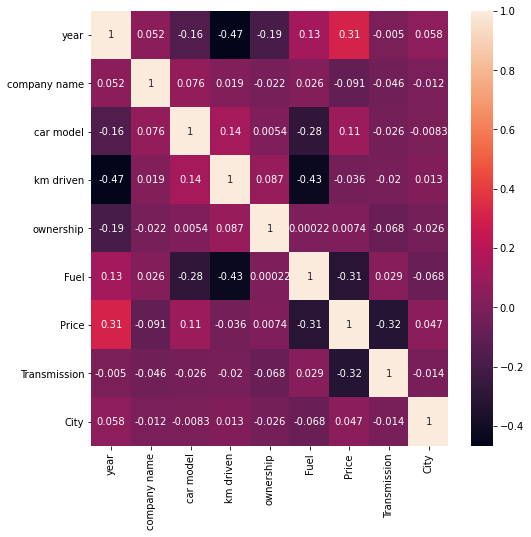

In [32]:
plt.figure(figsize=(8,8))
corr=df.corr()
sns.heatmap(data=corr,annot=True)

checking outliers

In [33]:
df.shape

(4168, 9)

In [34]:
from scipy.stats import zscore

In [35]:
z=abs(zscore(df))

In [36]:
threshold=3
print(np.where(z>3))

(array([   0,    9,   10,   40,   41,   42,   42,   48,   52,   54,   64,
        113,  117,  118,  122,  137,  152,  153,  169,  185,  185,  199,
        212,  225,  226,  227,  242,  244,  246,  246,  261,  261,  275,
        279,  281,  296,  314,  319,  353,  366,  392,  405,  408,  432,
        434,  445,  447,  458,  462,  467,  467,  469,  516,  519,  543,
        545,  556,  558,  569,  573,  578,  578,  580,  629,  642,  643,
        644,  659,  661,  663,  663,  678,  678,  692,  696,  698,  713,
        731,  736,  770,  783,  809,  813,  822,  823,  853,  854,  855,
        855,  861,  865,  867,  877,  926,  930,  931,  935,  949,  964,
        965,  981,  997,  997, 1011, 1022, 1024, 1030, 1038, 1043, 1056,
       1057, 1073, 1077, 1077, 1081, 1095, 1109, 1111, 1165, 1178, 1189,
       1199, 1209, 1225, 1242, 1252, 1271, 1272, 1274, 1291, 1297, 1305,
       1311, 1337, 1338, 1362, 1380, 1397, 1430, 1438, 1449, 1461, 1465,
       1467, 1479, 1493, 1690, 1699, 1708, 1708, 1

In [37]:
df_new=df[(z<3).all(axis=1)]

In [38]:
df_new.shape

(3842, 9)

In [39]:
dataloss=(4059-3741)/100
dataloss

3.18

In [40]:
df=df_new

skewness check

In [41]:
df.skew()

year           -0.644051
company name    0.279023
car model       0.334263
km driven       0.969103
ownership       1.884206
Fuel           -0.649749
Price           1.236245
Transmission   -2.945106
City           -0.044608
dtype: float64

In [42]:
df['km driven']=np.sqrt(df['km driven'])
df['Price']=np.sqrt(df['Price'])

In [43]:
df

,year,company name,car model,km driven,ownership,Fuel,Price,Transmission,City
1,2020,5,91,67.000000,0,1,975.960552,1,16
2,2020,5,91,23.388031,0,1,909.064904,1,16
3,2018,10,84,91.318125,0,1,766.158600,1,16
4,2016,9,56,210.917045,0,1,625.139185,1,16
5,2015,5,27,332.541727,0,0,952.732386,1,16
...,...,...,...,...,...,...,...,...,...
4162,2018,10,29,202.024751,0,0,771.685817,1,29
4164,2017,10,94,203.196949,0,0,874.070363,1,29
4165,2018,10,94,197.159834,0,0,869.021864,1,29
4166,2016,5,46,149.622859,0,1,660.680710,1,29


In [44]:
y=df['Price']


In [45]:
x=df.drop('Price',axis=1,inplace=True)
x

In [46]:
x=df

In [47]:
x

,year,company name,car model,km driven,ownership,Fuel,Transmission,City
1,2020,5,91,67.000000,0,1,1,16
2,2020,5,91,23.388031,0,1,1,16
3,2018,10,84,91.318125,0,1,1,16
4,2016,9,56,210.917045,0,1,1,16
5,2015,5,27,332.541727,0,0,1,16
...,...,...,...,...,...,...,...,...
4162,2018,10,29,202.024751,0,0,1,29
4164,2017,10,94,203.196949,0,0,1,29
4165,2018,10,94,197.159834,0,0,1,29
4166,2016,5,46,149.622859,0,1,1,29


# StandardScaler

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
std=StandardScaler()

In [50]:
X=std.fit_transform(x)

# Apply Models

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score

In [52]:
x_train,x_test,y_train,y_test=train_test_split(X,np.log(y),random_state=42,test_size=0.30)

In [53]:
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('Taining Score:-',ln.score(x_train,y_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score',r2_score(y_test,pred)*100)
print("Test Score",ln.score(x_test,y_test)*100)

Taining Score:- 46.13121055520772
Mean Absolute Error 0.1133657865400659
Mean Squared Error 0.01950195706778023
Root Mean Squared Erro 0.13964940768861223
R2 Score 46.7695636471795
Test Score 46.7695636471795


In [56]:
!pip install scikit-plot

In [57]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt

In [58]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()

In [59]:
kf=KFold(n_splits=5,shuffle=True)
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    predt=f.predict(x_train)
    print('----',f,'----')
    print('Taining Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
    print('Cross Validation Score',cross_val_score(f,x,y,cv=kf).mean()*100)
    r2=r2_score(y_test,pred)
    print('R2 Score',r2_score(y_test,pred))
    print("Test Score",f.score(x_test,y_test)*100)
    print('Model Peformance Cure')
    skplt.estimators.plot_learning_curve(f,X,y,cv=kf,scoring='r2',text_fontsize='large')
    plt.show()

---- SVR() ----
Taining Score:- 73.13828861118705
Mean Absolute Error 0.08908887394874306
Mean Squared Error 0.012111959920382892
Root Mean Squared Error 0.11005434984762252
Cross Validation Score -1.2246776424904704
R2 Score 0.669405019501851
Test Score 66.94050195018511
Model Peformance Cure


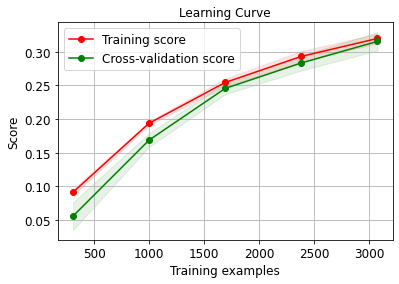

In [60]:
fun(svr)

---- SVR(kernel='linear') ----
Taining Score:- 45.90714694922361
Mean Absolute Error 0.11329785701345703
Mean Squared Error 0.019570068519545986
Root Mean Squared Error 0.13989306101285362
Cross Validation Score 41.12471561668644
R2 Score 0.465836539825487
Test Score 46.583653982548704
Model Peformance Cure


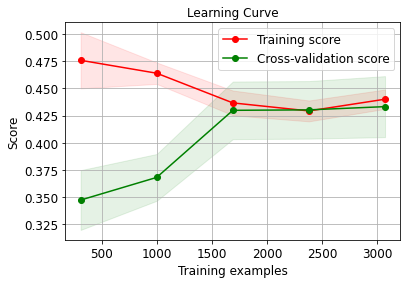

In [61]:
fun(svrl)

---- SVR(kernel='poly') ----
Taining Score:- 60.14804070690789
Mean Absolute Error 0.10505352865123023
Mean Squared Error 0.017185247121193462
Root Mean Squared Error 0.13109251359705276
Cross Validation Score -1.144240313811573
R2 Score 0.5309300497827918
Test Score 53.09300497827918
Model Peformance Cure


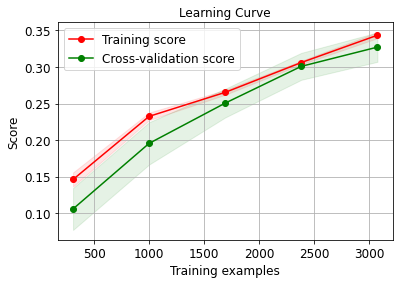

In [62]:
fun(svrp)

---- DecisionTreeRegressor() ----
Taining Score:- 99.99992423362168
Mean Absolute Error 0.03164478228437468
Mean Squared Error 0.004408086547579795
Root Mean Squared Error 0.06639342247225846
Cross Validation Score 87.5646226142729
R2 Score 0.8796816290830967
Test Score 87.96816290830967
Model Peformance Cure


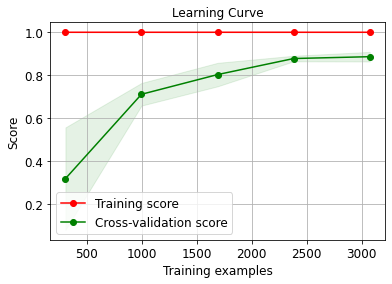

In [63]:
fun(dtc)

---- KNeighborsRegressor() ----
Taining Score:- 77.63855928166599
Mean Absolute Error 0.08523320550575275
Mean Squared Error 0.012630246278323395
Root Mean Squared Error 0.11238436847855397
Cross Validation Score 45.52090826571932
R2 Score 0.6552584346780812
Test Score 65.52584346780812
Model Peformance Cure


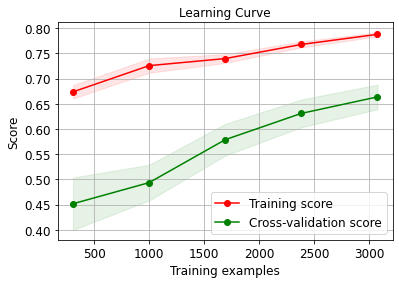

In [64]:
fun(knn)

# Regulization

In [65]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [66]:
ls=Lasso()
rd=Ridge()
es=ElasticNet()

---- Lasso() ----
Taining Score:- 0.0
Mean Absolute Error 0.15598258732373504
Mean Squared Error 0.03668127029115349
Root Mean Squared Error 0.1915235502259539
Cross Validation Score 44.75563083280556
R2 Score -0.0012123484774431148
Test Score -0.12123484774431148
Model Peformance Cure


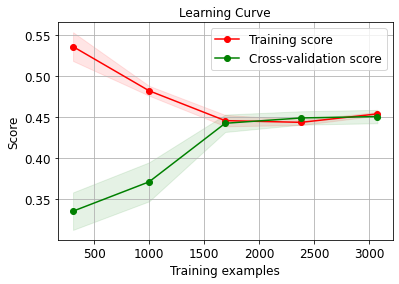

In [67]:
fun(ls)

---- Ridge() ----
Taining Score:- 46.131202051213926
Mean Absolute Error 0.11336500426629505
Mean Squared Error 0.019501407140922338
Root Mean Squared Error 0.13964743871952087
Cross Validation Score 44.99019068884049
R2 Score 0.4677106466815426
Test Score 46.77106466815426
Model Peformance Cure


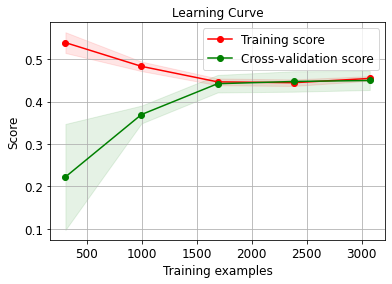

In [68]:
fun(rd)

---- ElasticNet() ----
Taining Score:- 0.0
Mean Absolute Error 0.15598258732373504
Mean Squared Error 0.03668127029115349
Root Mean Squared Error 0.1915235502259539
Cross Validation Score 32.59122413762034
R2 Score -0.0012123484774431148
Test Score -0.12123484774431148
Model Peformance Cure


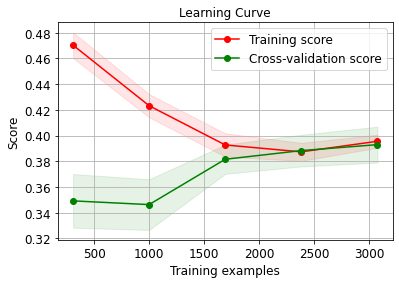

In [69]:
fun(es)

# Ensemble Methods

In [71]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.linear_model import SGDRegressor

In [73]:
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()
sgd=SGDRegressor()
bg=BaggingRegressor()

---- RandomForestRegressor() ----
Taining Score:- 99.01738206405936
Mean Absolute Error 0.030822128233702405
Mean Squared Error 0.0024303026874584284
Root Mean Squared Error 0.04929810024187979
Cross Validation Score 93.24665053384888
R2 Score 0.9336650818821799
Test Score 93.36650818821799
Model Peformance Cure


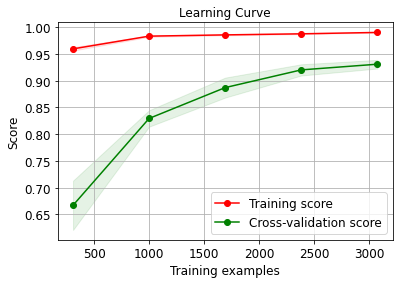

In [74]:
fun(rf)

---- AdaBoostRegressor() ----
Taining Score:- 63.520301113171726
Mean Absolute Error 0.09604520626423219
Mean Squared Error 0.014153620824418553
Root Mean Squared Error 0.11896899102042748
Cross Validation Score 55.7559413571819
R2 Score 0.6136780478812114
Test Score 61.36780478812114
Model Peformance Cure


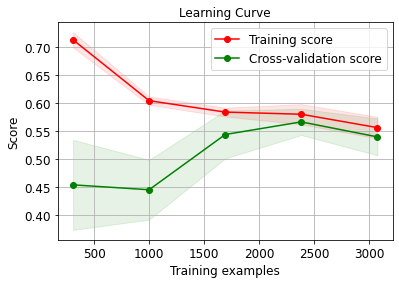

In [75]:
fun(ad)

---- GradientBoostingRegressor() ----
Taining Score:- 87.97255432181281
Mean Absolute Error 0.05504449228006125
Mean Squared Error 0.0052059084928402525
Root Mean Squared Error 0.07215198190514417
Cross Validation Score 84.40297595249048
R2 Score 0.8579051426871578
Test Score 85.79051426871578
Model Peformance Cure


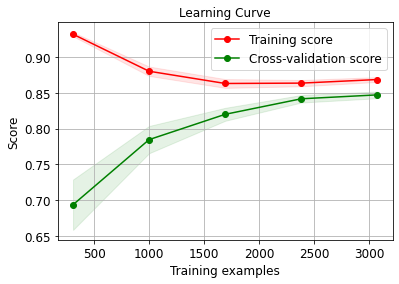

In [76]:
fun(gd)

---- SGDRegressor() ----
Taining Score:- 46.030570057595035
Mean Absolute Error 0.11378723480085101
Mean Squared Error 0.01960252154652008
Root Mean Squared Error 0.14000900523366375
Cross Validation Score -1.0596677593669675e+28
R2 Score 0.464950737041286
Test Score 46.4950737041286
Model Peformance Cure


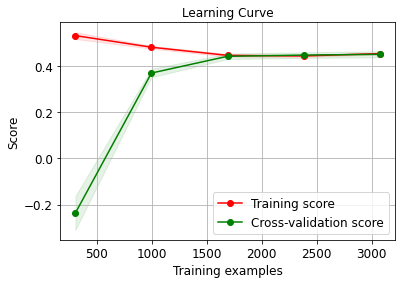

In [77]:
fun(sgd)

---- BaggingRegressor() ----
Taining Score:- 98.45243446165122
Mean Absolute Error 0.03312819876478655
Mean Squared Error 0.0027311073678226274
Root Mean Squared Error 0.05225999777863206
Cross Validation Score 91.97647323644131
R2 Score 0.9254546421108757
Test Score 92.54546421108756
Model Peformance Cure


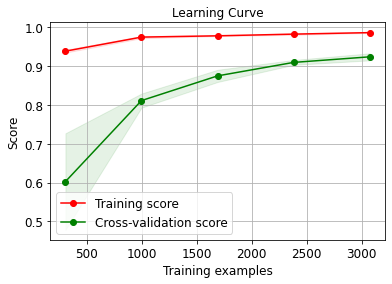

In [78]:
fun(bg)

# Hyper Parameter Tunning For Best Score

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
p1={'n_estimators':[100,150,250,500],'max_depth':[3,5,7,9,11],'min_samples_split':[1,2,3],'min_samples_leaf':[1,2],'max_features':['auto','log2','sqrt']}

In [81]:
g1=GridSearchCV(rf,p1)
g1.fit(x,y)
print(g1.best_params_)

{'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [84]:
rfr1=RandomForestRegressor(max_depth=11,max_features='auto',min_samples_leaf=1,n_estimators=500,min_samples_split=2)

---- RandomForestRegressor(max_depth=11, n_estimators=500) ----
Taining Score:- 96.27687199186984
Mean Absolute Error 0.03798637979000832
Mean Squared Error 0.0031237547502536156
Root Mean Squared Error 0.05589056047539348
Cross Validation Score 90.96921017389457
R2 Score 0.9147373631080801
Test Score 91.47373631080801
Model Peformance Cure


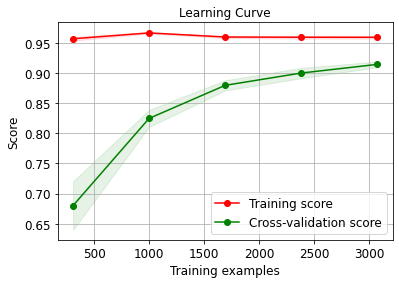

In [85]:
fun(rfr1)